In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install numdifftools
import numdifftools as nd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.5 MB/s eta 0:00:00


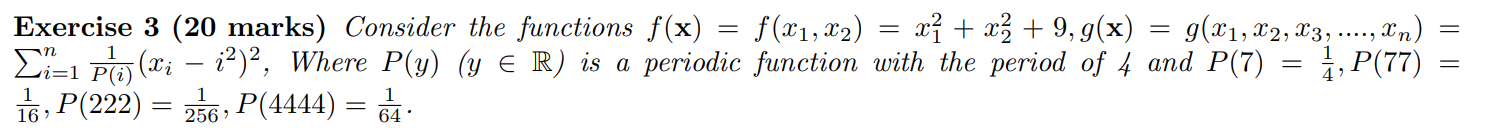

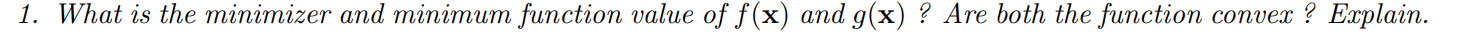

In [ ]:
def fx(x):
  return x[0]**2+x[1]**2+9


In [ ]:
#minimizer of fx=(0,0) and value=9
#minimizer of fx =(1,4,9,16,25,36................,n^2) and value=0


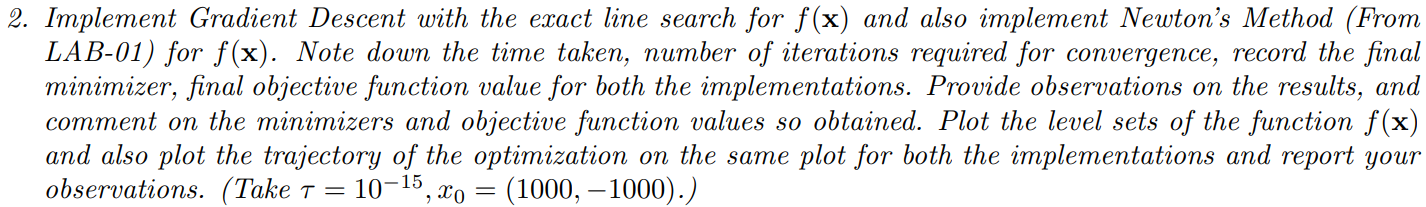

$f(x) = x_1^2 + x_2^2 + 9$, which means $\nabla{f} = <2x_1, 2x_2>$.
Using the exact line search methodology, we get, $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = argmin_{\alpha \geq 0}g(\alpha)$

$f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = f(x_1(1-2\alpha), x_2(1-2\alpha)) = (x_1^2 + x_2^2)(1-2\alpha)^2 + 9 = g(\alpha)$
Minimum for the above  function (which is always positive) will be achieved when $\alpha = 0.5$

Hence, the closed form solution for the $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = 0.5$

To apply newton's method we need hessian as well.

Here $\nabla{f} = <2x_1, 2x_2>$ which means
$\nabla^2{f} = \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}$

In [ ]:
def gradient_descent_step_line(x0):
    lis=[1e-15]
    new_optimal=[]
    coordinates=[]
    iteration=[]
    all_xy=[]
    for t in lis:
      x=x0
      d=nd.Gradient(fx,method='complex')(x)
      fx_norm=np.linalg.norm(d)
      k=0
      xy=[]
      while fx_norm > t:

        x=x-0.5*d
        d=nd.Gradient(fx)(x)#gx is analytic and its step lenth (alpha=1/2 always) therefore we can get solution in one step always.
        k=k+1
        fx_norm=np.linalg.norm(d)

        xy.append(x)
        #print(f'the norm at tau {t} is: {fx_norm}' )
      optimal=[fx(x)]
      coord=x
      all_xy.append(xy)
      #all_xy.append()
      coordinates.append(coord)
      new_optimal.append(optimal)
      iteration.append(k)
    #print(iteration)
    return new_optimal,coordinates,iteration,all_xy
gradient_descent_step_line([1000,-1000])[3]


[[array([0., 0.])]]

In [ ]:

from numpy.linalg import inv

def function(x):
    return (x[0]**2+x[1]**2+9)

def partial_derivative(x):

     return np.array([(2*x[0]),(2*x[1])])

def hessian(x):
    return np.array([[2, 0], [0, 2]])
def norm_grad(d):
  del_fx=np.sqrt(d[0]**2+d[1]**2)
  return del_fx
def newton_optimization(x,t):

    #x_optimal = x0
    lis=[1e-15]#,1e-16]#,1e-17,1e-18,1e-19]#,1e-20]
    new_optimal=[]
    coordinates=[]
    iteration=[]
    for t in lis:
      d=partial_derivative(x)
      fx_norm=norm_grad(d)
      hes=hessian(x)
      k=0
      while fx_norm>t:

        inv_hes=np.linalg.inv(hes)
        #print(inv_hes)
        #print(np.dot(inv_hes,d))
        x=x-np.dot(inv_hes,d)
        #print(x)
        d=partial_derivative(x)
        fx_norm=norm_grad(d)
        hes=hessian(x)
        #print(fx_norm)
        optimal=function(x)
        #print(optimal)
        coord=[x]
        k=k+1
      coordinates.append(coord)
      new_optimal.append(optimal)
      iteration.append(k)
    return new_optimal,coordinates,iteration
newton_optimization([-1.5,1.5],0.1)

([9.0], [[array([0., 0.])]], [1])

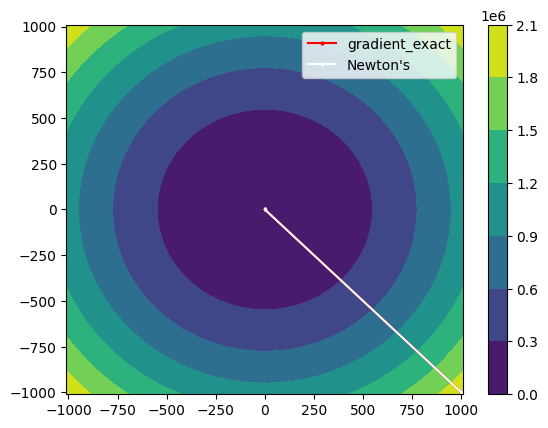

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
def fxnp(x1,x2):
  return x1**2 + x2**2 + 9
def gradf(x):
  return np.array([-2*x[0], -2*x[1]])
tau = 1e-15
x0 = np.array([1000,-1000])


def fx(x):
  x1 = x[0]
  x2 = x[0]
  return x1**2 + x2**2 + 9

iterations = []

xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1
x = np.linspace(-1010, 1010, 10000)
y = np.linspace(-1010, 1010, 10000)
X, Y = np.meshgrid(x, y)
Z = fxnp(X,Y)
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates = []
ycordinates = []
xcordinates.append(x0[0])
ycordinates.append(x0[1])
xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label = "gradient_exact")


## Newton's Method Trajectory

xcordinates = []
ycordinates = []
xcordinates.append(x0[0])
ycordinates.append(x0[1])
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])

plt.plot(xcordinates,ycordinates, marker='d', color="white", markersize = 2, label = "Newton's")
plt.legend()


plt.show()

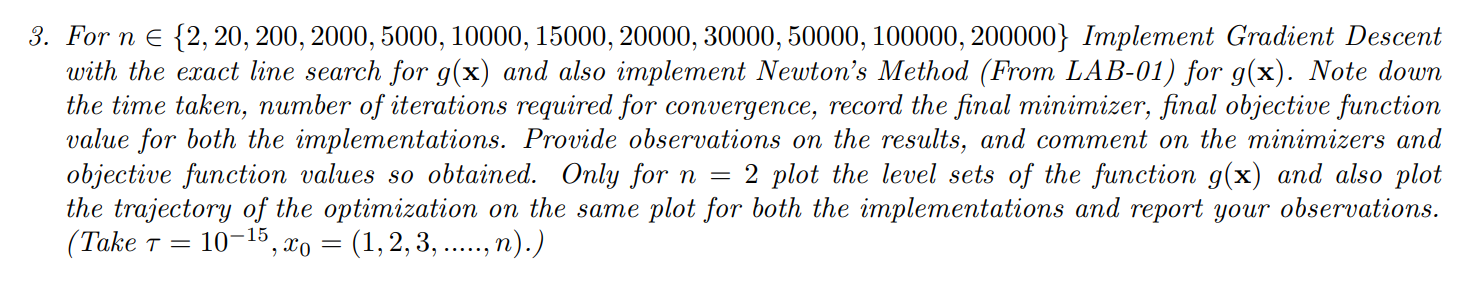

In [ ]:
def gx(x):
  p1=1/16
  p2=1/256
  p3=1/4
  p4=1/64
  a=0
  b=0
  c=0
  d=0
  #print(x)
  for i in range(1,1+len(x)):
    if i %4==1:
      a=1/p1*(x[i-1]-i**2)**2
    if i%4==2:
      b=1/p2*(x[i-1]-i**2)**2
    if i%4==3:
      c=1/p3*(x[i-1]-i**2)**2
    if i%4==0:
      d=1/p4*(x[i-1]-i**2)**2
  g=a+b+c+d
  return g



d=nd.Gradient(gx,method='complex')([1,2,3,4,5,6,7,8,9,10])
d


array([     0.,      0.,      0.,      0.,      0.,      0.,   -336.,
        -7168.,  -2304., -46080.])

In [ ]:
def grad_gx(x):
  p1=1/16
  p2=1/256
  p3=1/4
  p4=1/64
  a=0
  b=0
  c=0
  d=0
  g=[]
  #print(x)
  for i in range(1,1+len(x)):
    if i %4==1:
      a=2/p1*(x[i-1]-i**2)
      g.append(a)
    if i%4==2:
      b=2/p2*(x[i-1]-i**2)
      g.append(b)
    if i%4==3:
      c=2/p3*(x[i-1]-i**2)
      g.append(c)
    if i%4==0:
      d=2/p4*(x[i-1]-i**2)
      g.append(d)
  return g
grad_gx([1,2,3,4,5,6,7,8,9,10])


[0.0,
 -1024.0,
 -48.0,
 -1536.0,
 -640.0,
 -15360.0,
 -336.0,
 -7168.0,
 -2304.0,
 -46080.0]

In [ ]:
def norm(x):
  n=sum((x[i]**2 for i in range(len(x))))
  return np.sqrt(n)
norm([1,2,3])

3.7416573867739413

In [ ]:
def alpha(x):
  p1=1/16
  p2=1/256
  p3=1/4
  p4=1/64
  a=a1=0
  b=b1=0
  c=c1=0
  d=d1=0
  n=len(x)
  #print(x)
  for i in range(1,1+n):
    if i %4==1:
      a=(1/p1**2)*(x[i-1]-i**2)**2
    if i%4==2:
      b=(1/p2**2)*(x[i-1]-i**2)**2
    if i%4==3:
      c=(1/p3**2)*(x[i-1]-i**2)**2
    if i%4==0:
      d=(1/p4**2)*(x[i-1]-i**2)**2
  for i in range(1,1+n):
    if i %4==1:
      a1=(1/p1**3)*(x[i-1]-i**2)**2
    if i%4==2:
      b1=(1/p2**3)*(x[i-1]-i**2)**2
    if i%4==3:
      c1=(1/p3**3)*(x[i-1]-i**2)**2
    if i%4==0:
      d1=(1/p4**3)*(x[i-1]-i**2)**2
  num=a+b+c+d
  den=a1+b1+c1+d1
  if den==0:
    alpha_value=print('alpha not exist we get optimal')
  else:
    alpha_value=num/(2*den)
  return alpha_value
print(alpha([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]))
alpha([1,2])


0.0020970534932135067


0.001953125

In [ ]:
def gradient_descent_step_line(x0):
    lis=[1e-6]#,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]#,1e-16]#,1e-17,1e-18,1e-19]#,1e-20]
    new_optimal=[]
    coordinates=[]
    iteration=[]
    all_xy=[]
    t=1e-
    x=x0
    d=grad_gx(x)
    fx_norm=norm(d)
    k=0
    a=alpha(x)
    while fx_norm > t:
      if alpha(x)!='alpha not exist we get optimal':
        x=x-a*np.array(d)
        # print(x)
        d=grad_gx(np.array(x))#gx is analytic and its step lenth (alpha=1/2 always) therefore we can get solution in one step always.
        k=k+1
        fx_norm=norm(np.array(d))
        #print(fx_norm)

        #print(f'the norm at tau {t} is: {fx_norm}' )
      else:
        print('optimal value obtain : ',gx(x))
    optimal=[gx(x)]
    coord=x
    #all_xy.append()
    coordinates.append(coord)
    new_optimal.append(optimal)
    iteration.append(k)
  # print(iteration)
    return iteration
gradient_descent_step_line([x+1 for x in range(200)])


[1669]

Now for $g(\mathbf{x}) = \sum_{i=1}^{n}\frac{(x_i-i^2)^2}{P(i)}$

$\nabla g(\mathbf{x})= <\frac{2(x_i - i^2)}{P(i)}> $ where gradient is n dimensional vector for $i = 1, 2, ... n$

P(i) can also be calculated by using periodicity:

$P(0) = 1/64$

$P(1) = 1/16$

$P(2) = 1/256$

$P(3) = 1/4$

Rest can be calculated using periodicity.

In [ ]:
n = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

P = [1/64, 1/16, 1/256, 1/4]

def alpha(x):
  num = 0
  den = 0
  n = len(x)
  for i in range(1, n+1):
    num += (x[i-1] - i**2)**2/(P[i%4]**2)
  for i in range(1,n+1):
    den += (x[i-1] - i**2)**2/(P[i%4]**3)
  return num/(2*den)


def gradg(xk):
  return np.array([ 2*(xk[i]-(i+1)**2)/P[(i+1)%4]  for i in range(len(xk)) ])

def gx(x):
  res = 0
  for i in range(len(x)):
    res += (x[i] - (i+1)**2)**2/P[(i+1)%4]
  return res

tau = 1e-15


for k in n:
  print("present iteration is for n=", k)
  x0 = [i for i in range(1,k+1)]
  iterations = []
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  while norm(pk)>tau:
    alpha = alpha(xk)
    xk = xk - alpha*pk
    pk = gradg(xk)
    count += 1


  iterations.append(count)
  print("Total iteration taken by n: ", count)
  print("minimizer which is obtained : ", xk)
  print("minimum value obtained is: ", gx(xk))
  print("##########################################################")

present iteration is for n= 2
Total iteration taken by n:  1
minimizer which is obtained :  [1. 4.]
minimum value obtained is:  0.0
##########################################################
present iteration is for n= 20
Total iteration taken by n:  742
minimizer which is obtained :  [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169. 196.
 225. 256. 289. 324. 361. 400.]
minimum value obtained is:  0.0
##########################################################
present iteration is for n= 200
Total iteration taken by n:  651
minimizer which is obtained :  [1.0000e+00 4.0000e+00 9.0000e+00 1.6000e+01 2.5000e+01 3.6000e+01
 4.9000e+01 6.4000e+01 8.1000e+01 1.0000e+02 1.2100e+02 1.4400e+02
 1.6900e+02 1.9600e+02 2.2500e+02 2.5600e+02 2.8900e+02 3.2400e+02
 3.6100e+02 4.0000e+02 4.4100e+02 4.8400e+02 5.2900e+02 5.7600e+02
 6.2500e+02 6.7600e+02 7.2900e+02 7.8400e+02 8.4100e+02 9.0000e+02
 9.6100e+02 1.0240e+03 1.0890e+03 1.1560e+03 1.2250e+03 1.2960e+03
 1.3690e+03 1.4440e+03

KeyboardInterrupt: 

In [ ]:
## USing newton methods

n = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

P = [1/64, 1/16, 1/256, 1/4]

tau = 1e-15


for k in n:
  print("current iteration is for n=", k)
  A = np.zeros((k,k))
  for i in range(k):
    for j in range(k):
      if i==j:
        A[i,j] = 1/P[(i+1)%4]
  b = np.array([-2*i**2/P[i%4] for i in range(1,k+1)])
  c = sum([i**4/P[i%4] for i in range(1,k+1)])
  x0 = [i for i in range(1,k+1)]
  iterations = []
  xk = np.copy(x0)
  count = 0
  pk = 2*A@xk + b
  while norm(pk)>tau:
    xk = xk - np.linalg.inv(2*A)@(2*A@xk+b)
    pk = 2*A@xk + b
    count += 1

  iterations.append(count)
  print("number  iterations it took for this run is: ", count)
  print("minimizer of function is: ", xk)
  print("minimum value is: ", xk@A@xk + b@xk + c)
  print("#############################################")

current iteration is for n= 2
number  iterations it took for this run is:  1
minimizer of function is:  [1. 4.]
minimum value is:  0.0
#############################################
current iteration is for n= 20
number  iterations it took for this run is:  1
minimizer of function is:  [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169. 196.
 225. 256. 289. 324. 361. 400.]
minimum value is:  0.0
#############################################
current iteration is for n= 200
number  iterations it took for this run is:  1
minimizer of function is:  [1.0000e+00 4.0000e+00 9.0000e+00 1.6000e+01 2.5000e+01 3.6000e+01
 4.9000e+01 6.4000e+01 8.1000e+01 1.0000e+02 1.2100e+02 1.4400e+02
 1.6900e+02 1.9600e+02 2.2500e+02 2.5600e+02 2.8900e+02 3.2400e+02
 3.6100e+02 4.0000e+02 4.4100e+02 4.8400e+02 5.2900e+02 5.7600e+02
 6.2500e+02 6.7600e+02 7.2900e+02 7.8400e+02 8.4100e+02 9.0000e+02
 9.6100e+02 1.0240e+03 1.0890e+03 1.1560e+03 1.2250e+03 1.2960e+03
 1.3690e+03 1.4440e+03 1.5210e+03 

**QUES=4**


Report for which value of n in (3) the Newton’s Method implementation got failed due to Google Colab Crash. If
we change the starting point x0 in part (2), then will the number of iterations required for convergence decreases,
increases or remains same ?, What about the same in part (3) ? Explain. Now consider g(x) for this n at
which Google Colab Crash occurs and devise a method, implement it such that we get the number of iterations
required for convergence as 1. Here, in the implementation part you are free to choose any starting point which is related to your devised method but take τ = 10−15. Explain the devised method clearly and provide the logical
observations of the results that you got. (Hint: Use the results from (2) and think about relating g(x) and
f(x).)

SO here it take lot of time to run so we have to wait
but newtons method crash at 2000 itearation and which is the drawback of this method becaue in higher order newton method is nor suitable as compare to backtracking gradient of gradient by direct step


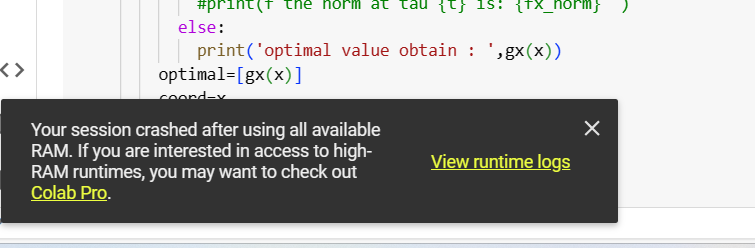

$f(x) = x_1^2 + x_2^2 + 9$, which means $\nabla{f} = <2x_1, 2x_2>$.
Using the exact line search methodology, we get, $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = argmin_{\alpha \geq 0}g(\alpha)$

$f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = f(x_1(1-2\alpha), x_2(1-2\alpha)) = (x_1^2 + x_2^2)(1-2\alpha)^2 + 9 = g(\alpha)$
Minimum for the above  function (which is always positive) will be achieved when $\alpha = 0.5$

Hence, the closed form solution for the $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = 0.5$